# Elastic network analysis

Here we use a Gaussian network model to characterise conformational states of a trajectory.

**Last executed:** Feb 06, 2020 with MDAnalysis 0.20.2-dev0

**Last updated:** January 2020

**Minimum version of MDAnalysis:** 0.17.0

**Packages required:**
    
* MDAnalysis (<a data-cite="michaud-agrawal_mdanalysis_2011" href="https://doi.org/10.1002/jcc.21787">Michaud-Agrawal *et al.*, 2011</a>, <a data-cite="gowers_mdanalysis_2016" href="https://doi.org/10.25080/Majora-629e541a-00e">Gowers *et al.*, 2016</a>)
* MDAnalysisTests

**Optional packages for visualisation:**

* [matplotlib](https://matplotlib.org)

<div class="alert alert-info">
    
**Note**

The elastic network analysis follows the approach of (<a data-cite="hall_characterization_2007" href="https://doi.org/10.1021/ja071797y">Hall *et al.*, 2007</a>). Please cite them when using the ``MDAnalysis.analysis.gnm`` module in published work.

</div>

In [1]:
import MDAnalysis as mda
from MDAnalysis.tests.datafiles import PSF, DCD, DCD2
from MDAnalysis.analysis import gnm
import matplotlib.pyplot as plt
%matplotlib inline

## Loading files

The test files we will be working with here feature adenylate kinase (AdK), a phosophotransferase enzyme. (<a data-cite="beckstein_zipping_2009" href="https://doi.org/10.1016/j.jmb.2009.09.009">Beckstein *et al.*, 2009</a>)

In [2]:
u1 = mda.Universe(PSF, DCD)
u2 = mda.Universe(PSF, DCD2)

## Using a Gaussian network model

Using a Gaussian network model to represent a molecule as an elastic network, we can characterise the concerted motions of a protein, and the dominance of these motions, over a trajectory. The analysis is applied to the atoms in the `selection`. If two atoms are within the `cutoff` distance (default: 7 ångström), they are considered to be bound by a spring. This analysis is reasonably robust to the choice of cutoff (between 5-9 Å), but the singular value decomposition may not converge with a lower cutoff.

In [3]:
nma1 = gnm.GNMAnalysis(u1,
                      selection='name CA',
                      cutoff=7.0)
nma1.run()

The output is saved in `nma1.results`: the time in picoseconds, the first eigenvalue, and the first eigenvector, associated with each frame.

In [4]:
len(nma1.results)

98

In [5]:
nma2 = gnm.GNMAnalysis(u2,
                      selection='name CA',
                      cutoff=7.0)
nma2.run()

Unlike normal mode analysis, Gaussian network model analysis uses only a single eigenvalue to represent the rotation and translation of each frame. The motion with the lowest positive eigenvalue represents the dominant motion of a structure. The frequency of this motion is the square root of the eigenvalue.

Plotting the probability distribution of the frequency for the first eigenvector can highlight variation in the probability distribution, which can indicate trajectories in different states.

Below, we plot the distribution of eigenvalues. The dominant conformation state is represented by the peak at 0.06.

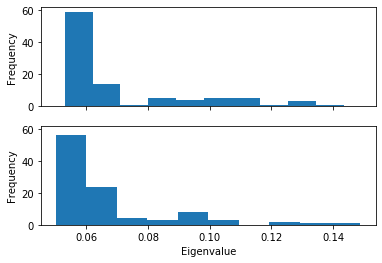

In [6]:
eigenvalues1 = [res[1] for res in nma1.results]
eigenvalues2 = [res[1] for res in nma2.results]

histfig, histax = plt.subplots(nrows=2, sharex=True, sharey=True)
histax[0].hist(eigenvalues1)
histax[1].hist(eigenvalues2)

histax[1].set_xlabel('Eigenvalue')
histax[0].set_ylabel('Frequency')
histax[1].set_ylabel('Frequency');

When we plot how the eigenvalue varies with time, we can see that the simulation transitions into the dominant conformation and stays there in both trajectories.

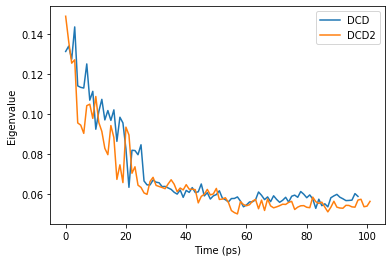

In [7]:
time1 = [res[0] for res in nma1.results]
time2 = [res[0] for res in nma2.results]
linefig, lineax = plt.subplots()
plt.plot(time1, eigenvalues1, label='DCD')
plt.plot(time2, eigenvalues2, label='DCD2')
lineax.set_xlabel('Time (ps)')
lineax.set_ylabel('Eigenvalue')
plt.legend();

DCD and DCD2 appear to be in similar conformation states.

## Using a Gaussian network model with only close contacts

The `MDAnalysis.analysis.gnm.closeContactGNMAnalysis` class provides a version of the analysis where the Kirchhoff contact matrix is generated from close contacts between individual atoms in different residues, whereas the `GNMAnalysis` class generates it directly from all the atoms. In this close contacts class, you can weight the contact matrix by the number of atoms in the residues.

In [8]:
nma_close = gnm.closeContactGNMAnalysis(u1,
                                        selection='name CA',
                                        cutoff=7.0,
                                        weights='size')
nma_close.run()

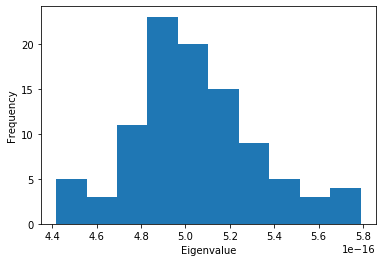

In [9]:
eigenvalues_close = [res[1] for res in nma_close.results]

plt.hist(eigenvalues_close)
plt.xlabel('Eigenvalue')
plt.ylabel('Frequency');

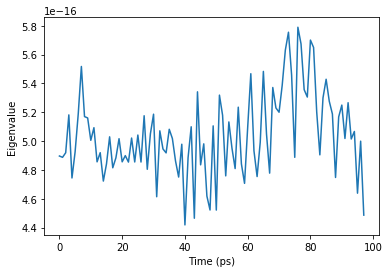

In [10]:
time_close = [res[0] for res in nma_close.results]
ax = plt.plot(time_close, eigenvalues_close)
plt.xlabel('Time (ps)')
plt.ylabel('Eigenvalue');

## References

[1] Oliver Beckstein, Elizabeth&nbsp;J. Denning, Juan&nbsp;R. Perilla, and Thomas&nbsp;B. Woolf.
Zipping and <span class="bibtex-protected">Unzipping</span> of <span class="bibtex-protected">Adenylate</span> <span class="bibtex-protected">Kinase</span>: <span class="bibtex-protected">Atomistic</span> <span class="bibtex-protected">Insights</span> into the <span class="bibtex-protected">Ensemble</span> of <span class="bibtex-protected">Open</span>↔<span class="bibtex-protected">Closed</span> <span class="bibtex-protected">Transitions</span>.
<em>Journal of Molecular Biology</em>, 394(1):160–176, November 2009.
00107.
URL: <a href="https://linkinghub.elsevier.com/retrieve/pii/S0022283609011164">https://linkinghub.elsevier.com/retrieve/pii/S0022283609011164</a>, <a href="https://doi.org/10.1016/j.jmb.2009.09.009">doi:10.1016/j.jmb.2009.09.009</a>.

[2] Richard&nbsp;J. Gowers, Max Linke, Jonathan Barnoud, Tyler J.&nbsp;E. Reddy, Manuel&nbsp;N. Melo, Sean&nbsp;L. Seyler, Jan Domański, David&nbsp;L. Dotson, Sébastien Buchoux, Ian&nbsp;M. Kenney, and Oliver Beckstein.
<span class="bibtex-protected">MDAnalysis</span>: <span class="bibtex-protected">A</span> <span class="bibtex-protected">Python</span> <span class="bibtex-protected">Package</span> for the <span class="bibtex-protected">Rapid</span> <span class="bibtex-protected">Analysis</span> of <span class="bibtex-protected">Molecular</span> <span class="bibtex-protected">Dynamics</span> <span class="bibtex-protected">Simulations</span>.
<em>Proceedings of the 15th Python in Science Conference</em>, pages 98–105, 2016.
00152.
URL: <a href="https://conference.scipy.org/proceedings/scipy2016/oliver_beckstein.html">https://conference.scipy.org/proceedings/scipy2016/oliver_beckstein.html</a>, <a href="https://doi.org/10.25080/Majora-629e541a-00e">doi:10.25080/Majora-629e541a-00e</a>.

[3] Benjamin&nbsp;A. Hall, Samantha&nbsp;L. Kaye, Andy Pang, Rafael Perera, and Philip&nbsp;C. Biggin.
Characterization of <span class="bibtex-protected">Protein</span> <span class="bibtex-protected">Conformational</span> <span class="bibtex-protected">States</span> by <span class="bibtex-protected">Normal</span>-<span class="bibtex-protected">Mode</span> <span class="bibtex-protected">Frequencies</span>.
<em>Journal of the American Chemical Society</em>, 129(37):11394–11401, September 2007.
00020.
URL: <a href="https://doi.org/10.1021/ja071797y">https://doi.org/10.1021/ja071797y</a>, <a href="https://doi.org/10.1021/ja071797y">doi:10.1021/ja071797y</a>.

[4] Naveen Michaud-Agrawal, Elizabeth&nbsp;J. Denning, Thomas&nbsp;B. Woolf, and Oliver Beckstein.
<span class="bibtex-protected">MDAnalysis</span>: <span class="bibtex-protected">A</span> toolkit for the analysis of molecular dynamics simulations.
<em>Journal of Computational Chemistry</em>, 32(10):2319–2327, July 2011.
00778.
URL: <a href="http://doi.wiley.com/10.1002/jcc.21787">http://doi.wiley.com/10.1002/jcc.21787</a>, <a href="https://doi.org/10.1002/jcc.21787">doi:10.1002/jcc.21787</a>.